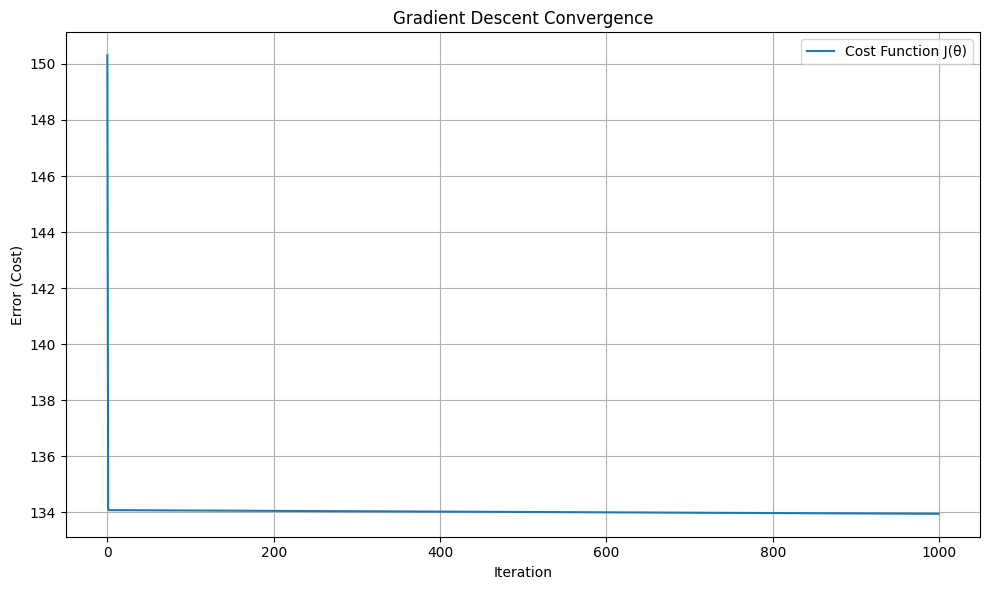

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import httpx


def collect_dataset():
    """Collect dataset of CSGO (ADR vs Rating)"""
    response = httpx.get(
        "https://raw.githubusercontent.com/yashLadha/The_Math_of_Intelligence/"
        "master/Week1/ADRvsRating.csv",
        timeout=10,
    )
    lines = response.text.splitlines()
    data = [line.split(",") for line in lines]
    data.pop(0)  # remove header
    dataset = np.array(data, dtype=float)
    return dataset


def run_steep_gradient_descent(data_x, data_y, len_data, alpha, theta):
    """Performs a single step of batch gradient descent"""
    n = len_data
    pred = np.dot(theta, data_x.T)
    error = pred - data_y.T
    gradient = np.dot(error, data_x)
    theta = theta - (alpha / n) * gradient
    return theta


def sum_of_square_error(data_x, data_y, len_data, theta):
    """Compute mean squared error"""
    pred = np.dot(theta, data_x.T)
    error = pred - data_y.T
    return np.sum(np.square(error)) / (2 * len_data)


def run_linear_regression(data_x, data_y, iterations=1000, alpha=0.000155):
    """Run linear regression with gradient descent"""
    no_features = data_x.shape[1]
    len_data = data_x.shape[0]

    theta = np.zeros((1, no_features))
    error_history = []

    for i in range(iterations):
        theta = run_steep_gradient_descent(data_x, data_y, len_data, alpha, theta)
        error = sum_of_square_error(data_x, data_y, len_data, theta)
        error_history.append(error)

    return theta, error_history


# Collect and preprocess data
data = collect_dataset()
len_data = data.shape[0]
data_x = np.c_[np.ones(len_data), data[:, :-1]]
data_y = data[:, -1]

# Run linear regression and collect error history
theta, error_history = run_linear_regression(data_x, data_y)

# Plot error over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(error_history)), error_history, label="Cost Function J(θ)")
plt.xlabel("Iteration")
plt.ylabel("Error (Cost)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
